Importing Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical


Loading Images From Folder

In [4]:

import os
import cv2
import numpy as np

def convert_to_grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def data_loader(path_train, path_test):
    train_list = [folder for folder in os.listdir(path_train) if os.path.isdir(os.path.join(path_train, folder))]
    num_classes = len(train_list)

    x_train = []
    y_train = []
    x_test = []
    y_test = []

    for label, folder in enumerate(train_list):
        path1 = os.path.join(path_train, str(folder))
        images = os.listdir(path1)

        for file in images:
            path2 = os.path.join(path1, str(file))

            # Read the image from the directory
            img = cv2.imread(path2)
            # img_bw = convert_to_grayscale(img)

            # Append image to the train data list
            x_train.append(img)

            # Append class-label corresponding to the image
            y_train.append(label)

        # Loading testing data
        path1 = os.path.join(path_test, str(folder))
        images = os.listdir(path1)

        for file in images:
            path2 = os.path.join(path1, str(file))


            # Read the image from the directory
            img = cv2.imread(path2)
            # img_bw = convert_to_grayscale(img)

            # Append image to the test data list
            x_test.append(img)

            # Append class-label corresponding to the image
            y_test.append(label)

    # Convert lists into numpy arrays
    x_train = np.asarray(x_train)
    y_train = np.asarray(y_train)
    x_test = np.asarray(x_test)
    y_test = np.asarray(y_test)

    return x_train, y_train, x_test, y_test

# path specified by the user
path_train = 'cifar-3class-data/train'
path_test = 'cifar-3class-data/test'
X_train, y_train, X_test, y_test = data_loader(path_train, path_test)

print("Loading Done")


Loading Done


In [5]:
print(X_train.shape, y_train.shape)
# print(X_val.shape, y_val.shape)

(1500, 32, 32, 3) (1500,)


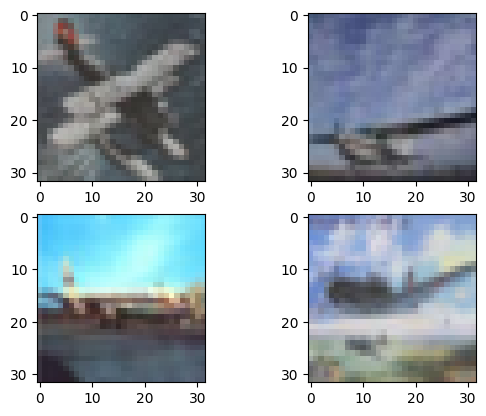

In [6]:

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("train-set shape:", X_train1.shape)
print("test-set shape:", X_val.shape)
print("train-label shape:", y_train1.shape)
print("test-label shape:", y_val.shape)
class_no=0
mydict={}
for i in y_val:
    if i not in mydict:
        mydict[i]=1
        class_no+=1
    else:
        pass
print(class_no)
        

train-set shape: (1350, 32, 32, 3)
test-set shape: (150, 32, 32, 3)
train-label shape: (1350,)
test-label shape: (150,)
3


Q2 STARTS HERE

In [ ]:

input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])

X_train1 = X_train1/ 255

X_val= X_val/ 255

y_train2 = to_categorical(y_train1,num_classes=3)

y_val2 = to_categorical(y_val,num_classes=3)

print(X_train1.shape,y_train2.shape)
print(X_val.shape,y_val2.shape)

(1350, 32, 32, 3) (1350, 3)
(150, 32, 32, 3) (150, 3)


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))




In [ ]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],run_eagerly=True)

Epoch 1/50
7/7 [==============================] - 6s 875ms/step - loss: 1.1059 - accuracy: 0.3815 - val_loss: 1.0703 - val_accuracy: 0.3400
Epoch 2/50
7/7 [==============================] - 6s 846ms/step - loss: 0.9809 - accuracy: 0.5437 - val_loss: 0.9773 - val_accuracy: 0.5933
Epoch 3/50
7/7 [==============================] - 6s 854ms/step - loss: 0.8596 - accuracy: 0.6096 - val_loss: 0.6839 - val_accuracy: 0.7800
Epoch 4/50
7/7 [==============================] - 6s 854ms/step - loss: 0.6763 - accuracy: 0.7237 - val_loss: 0.6748 - val_accuracy: 0.6933
Epoch 5/50
7/7 [==============================] - 6s 831ms/step - loss: 0.6056 - accuracy: 0.7452 - val_loss: 0.5988 - val_accuracy: 0.7267
Epoch 6/50
7/7 [==============================] - 6s 853ms/step - loss: 0.5481 - accuracy: 0.7815 - val_loss: 0.6185 - val_accuracy: 0.7267
Epoch 7/50
7/7 [==============================] - 6s 876ms/step - loss: 0.5352 - accuracy: 0.7689 - val_loss: 0.5067 - val_accuracy: 0.8000
Epoch 8/50
7/7 [====

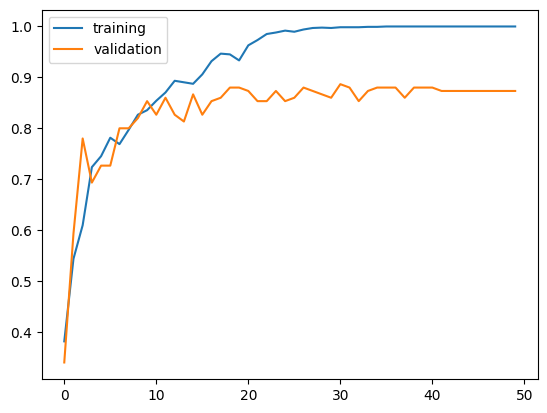

In [ ]:
history = model.fit(X_train1, y_train2, validation_data=(X_val, y_val2), epochs=50, batch_size=200)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
model.save("cnn_q2_i.h5")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


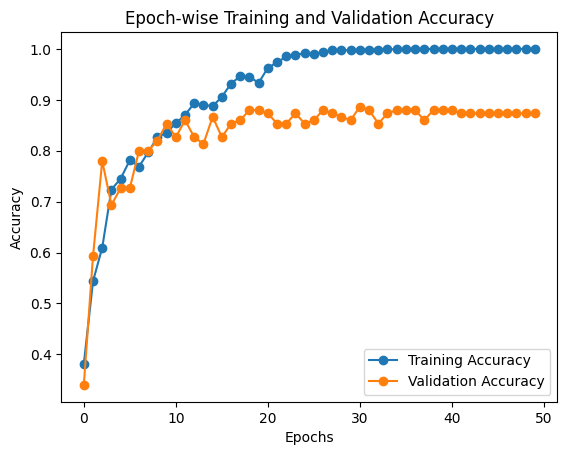

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epoch-wise Training and Validation Accuracy')

# Display the legend
plt.legend()

# Display the plot
plt.show()

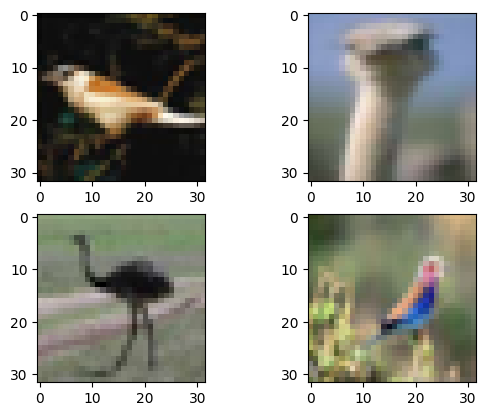

In [ ]:
X_train, y_train, X_test, y_test = data_loader(path_train, path_test)
plt.subplot(221)
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_test[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_test[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_test[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
X_train, y_train, X_test, y_test = data_loader(path_train, path_test)
input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])

X_train = X_train/ 255

X_test= X_test/ 255

y_train1 = to_categorical(y_train,num_classes=3)

y_test1 = to_categorical(y_test,num_classes=3)

print(X_train.shape,y_train1.shape)
print(X_test.shape,y_test1.shape)

(1500, 32, 32, 3) (1500, 3)
(300, 32, 32, 3) (300, 3)


In [ ]:

model.load_weights("cnn_q2_i.h5")

y_pred = model.predict(X_test)
print(y_pred)
pred_class=[]
for i in y_pred:
    i=list(i)
    j=i.index(max(i))
    pred_class.append(j)




10/10 [==============================] - 0s 31ms/step
[[9.98777061e-10 1.43403653e-04 9.99856591e-01]
 [9.95666385e-01 4.33362881e-03 2.25469469e-12]
 [7.87493527e-01 2.12414905e-01 9.15589408e-05]
 [9.99191105e-01 8.08879035e-04 2.54577240e-12]
 [1.00000000e+00 1.50168899e-13 6.21710140e-17]
 [1.00000000e+00 7.25633303e-11 2.46106958e-16]
 [6.31233775e-07 9.99999404e-01 2.79231180e-08]
 [2.08355188e-01 7.88822770e-01 2.82199215e-03]
 [1.03574700e-06 9.99817073e-01 1.81881405e-04]
 [1.00000000e+00 1.40969741e-17 1.14485571e-19]
 [1.00000000e+00 2.78038988e-14 3.01263226e-14]
 [1.46819511e-02 9.85318065e-01 1.91777531e-11]
 [2.02137958e-02 9.79786217e-01 5.60780622e-09]
 [1.00000000e+00 4.57669005e-13 1.65763130e-16]
 [1.00000000e+00 1.01490649e-09 8.98473624e-13]
 [9.98144388e-01 1.85564021e-03 7.33061434e-09]
 [1.00000000e+00 5.33393676e-11 3.68339595e-11]
 [9.94148850e-01 4.40074736e-03 1.45049510e-03]
 [1.00000000e+00 5.50674212e-14 2.80152336e-14]
 [9.99999881e-01 5.38650440e-08 6.

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred_class)
print("Confusion Matrix:")
print(conf_matrix)




Confusion Matrix:
[[80 15  5]
 [19 71 10]
 [ 2  5 93]]


In [ ]:
#printing the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred_class)

print("Accuracy:", accuracy*100)

Accuracy: 81.33333333333333
